# Tp5 Dimitris 

## Non-blind watermark detection
### Exercise 1
Read the image cameraman.tif in. It will serve as host image x.
For given hypothesis:

$$H 0 : v = x + z$$
$$H 1 : v = x + w + z$$

where x is the host image, v is the marked image, w is the watermark and z is additive white Gaussian

noise, i.e.$ Z ∼ N (0, σ^2 _{noise} I)$


In [0]:
import matplotlib.image as mpimg; import matplotlib.pyplot as plt; import numpy as np; import requests; from PIL import Image; from io import BytesIO; import math; from skimage import data

url = "https://github.com/partizanos/multimedia_security/raw/master/multimedia_5/cameraman.tif"
response = requests.get(url)
im = Image.open(BytesIO(response.content))
X  = np.array(im)
N1, N2 = X.shape
N = int(N1*N2)

Hypothesis and watermark definition as on TP4

In [0]:
def imageShape(img):
  N1, N2 = X.shape
  assert X.shape == (256, 256)
  return int(N1*N2)


def watermark(gamma, img, theta):
  assert type (gamma) ==int
  N1, N2 = img.shape
  size = imageShape(img)
  assert type (size) ==int
  indices=[]
  
  #   Generate a matrix w’ of size x with uniform distributed values {−1, 1}. 
  #   The magnitude of these two values governs the watermark strength.
  w_prime = np.random.uniform(-gamma,gamma,size)
  w_prime = w_prime.reshape((N1, N2))
  
  #   Randomly sample from matrix w’ with a given density θN = 0.5
  for i in range(int(size * theta )):
    indices.append((np.random.randint(N1), np.random.randint(N2)))
    
  w = np.zeros((N1,N2))
  for tup in indices:
    w[tup] = w_prime[tup]
  return w 



def get_Hypothesis(X, sigma_noise, gamma, theta):
  # V = X + Z
  N1, N2 = X.shape
  Z = np.random.normal(0, sigma_noise, imageShape(X)).reshape((N1, N2))
  V_H0 = X + Z
  w = watermark(gamma, X, theta)
  V_H1 = V_H0 + w
  return V_H0, V_H1, w 

def rho_non_blind(v, w, X, N ):
  w_non_blind = v - X 
  return  np.sum(w.reshape((N))*w_non_blind.reshape((N))) / (N) 


For hypothesis $H_ 1$ and $ρ^{H_ 1}$ the watermark w is generated J times with a fixed strength γ = ±1
2
and a fixed density $θ _N$ = 0.1. The noise realization z is again fixed with $σ _{noise}
= 50.$

Fill out Table 1 with all results. Note that obviously only the noise and not the watermark has influence on hypothesis H 0 , so the relevant cells have been grayed out.

Determine rho mu and sigma parameter  for H_0 and H_1

In [0]:
# sigmas =[50, 100];
# densities = [0.1, 0.3];
# gammas = [1, 5];

# sigma_noise = 50
# theta = 0.1
# gamma = 1 


def experiment(X, sigma_noise, gamma, theta, J ):
  rho_h0_list = []
  rho_h1_list = []

  for j in range(J):
    vh0, vh1, w = get_Hypothesis(X, sigma_noise, gamma, theta)
    rho_h0_list.append(rho_non_blind(vh0, w, X, N ))
    rho_h1_list.append(rho_non_blind(vh1, w, X, N ))

  rho_h0_list = np.array(rho_h0_list)
  rho_h1_list = np.array(rho_h1_list)  

  mu_h0 = np.sum(rho_h0_list)/J
  mu_h1 = np.sum(rho_h1_list)/J

  sigma_h0 = (np.sum(rho_h0_list - mu_h0)**2) / J
  sigma_h1 = (np.sum(rho_h1_list - mu_h1)**2) / J

  print("sigma noise: ", sigma_noise)
  print("theta: ", theta)
  print("gamma: ", gamma)
  print("### mu|h0: ",mu_h0, ", : mu|h1 ", mu_h1, " sigma_h0: ", sigma_h0, "sigma_h1: ", sigma_h1  )
  return mu_h0, mu_h1,  sigma_h0,  sigma_h1

Text(0.5, 1.0, 'h1')

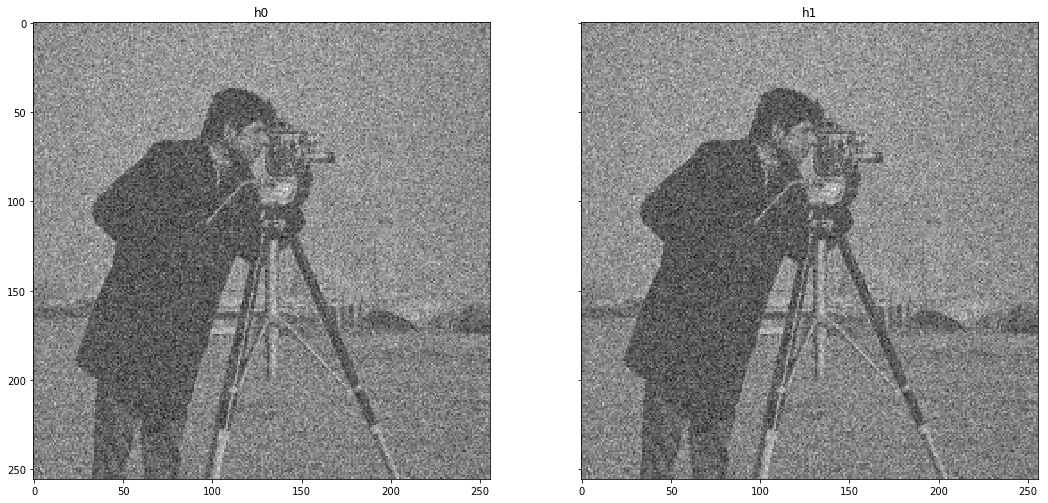

In [0]:
sigma_noise, gamma, theta = 50, 5, 0.3
vh0, vh1, w = get_Hypothesis(X, sigma_noise, gamma, theta)

fig, ax = plt.subplots(
        ncols=2, 
        sharex=True, 
        sharey=True,
        figsize=(18, 18)
)

ax[0].imshow(vh0, 'gray')
ax[0].set_title("h0")
ax[1].imshow(vh0, 'gray')
ax[1].set_title("h1")

Calculate and display the Receiver Operating Characteristic (ROC) curve for the binary threshold
test following the above mentioned experiment set up. The detection threshold is denoted with
$T _{ρ\_ non-blind}$ .

sigma noise:  100
theta:  0.3
gamma:  5
### mu|h0:  0.02934624882850422 , : mu|h1  2.1866707796884346  sigma_h0:  2.7733391199176195e-34 sigma_h1:  2.174297870015414e-31


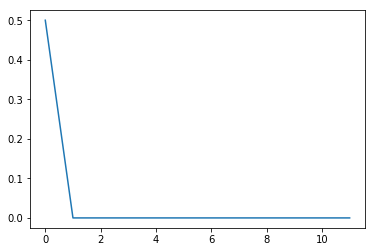

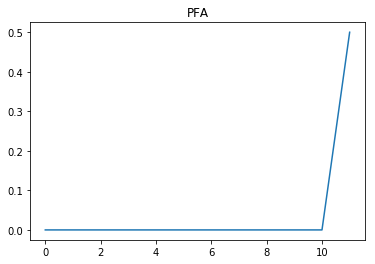

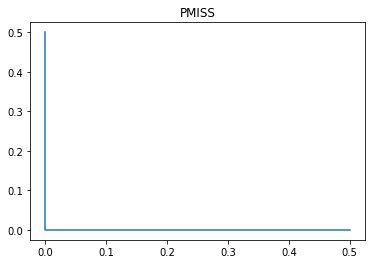

Text(0.5, 1.0, 'ROC')

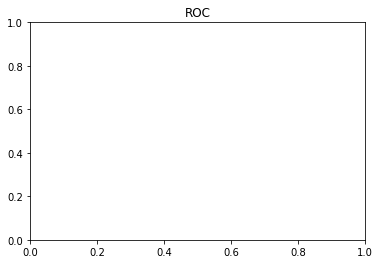

In [0]:
from scipy.stats import norm
sigma_noise, gamma, theta = 100, 5, 0.3 

[mu_H0, mu_H1, var_H0, var_H1] =  experiment(X, sigma_noise, gamma, theta, J );
threshold = np.linspace(mu_H0-var_H0,mu_H1+var_H1,12);
PFA=[]
PMISS=[]
for i in range(len(threshold)):
    PFA.append(1 - norm.cdf(threshold[i], mu_H0, var_H0))
    PMISS.append(norm.cdf(threshold[i], mu_H1, var_H1))

plt.plot(PFA); plt.show(); plt.title("PFA")
plt.plot(PMISS); plt.show(); plt.title("PMISS")
plt.plot(PFA,PMISS); plt.show(); plt.title("ROC")

<!-- ## 1.2 Exercise
1. The detection threshold is denoted with $T _ρ$ non-blind , evaluate the following numerically for the
non-blind detection shown in Figure 1:

• $p_f$ , the probability of false alarm

• $p_m$ , the probability of miss

• $p_ d$ , the probability of correct detection, defined as $1 − p _m$


where $μ_ρ|H_0 , σ_ρ|H_0 , μ_ρ|H_1,  σ_ρ|H_1 $are the means and variances of the linear correlation ρ under
hypothesis $H_0$ and $H_1$ for J realizations each. They can be ascertained as follows: -->

<!-- 3. Fill out Table 1 with all results. Note that obviously only the noise and not the watermark has
influence on hypothesis H 0 , so the relevant cells have been grayed out.


|      |   $\sigma^2 _{noise} = 50$ |  |  |  |  |   $\sigma^2 _{noise} = 100$ | | | | |
| ------------- |:- |:- |:- |:- |:----------- |:- |:- |:- |:- |:------:|
|  |  $\theta _N = 0.1$  | |$\theta _N = 0.3 $|||  $\theta _N = 0.1$| |$\theta _N = 0.3 $|
|  |  $\gamma \pm = 1$| $\gamma \pm = 5$ |   $\gamma \pm = 1$ |$\gamma \pm = 5$||  $\gamma \pm = 1$| $\gamma \pm = 5$ |   $\gamma \pm = 1$ |$\gamma \pm = 5$|
|$\mu | H_0$ | | | | | | | | | |
|$\sigma | H_0$ | | | | | | | | | |
|$\mu | H_1$ | | | | | | | | | |
|$\mu | H_1$ | | | | | | | | | | -->

In [0]:

sigmas =[50, 100];
densities = [0.1, 0.3];
gammas = [1, 5];
J = 100
for sigma in sigmas:
  for theta in densities:
    for gamma in gammas:
      print("Running experiment with parameters: ", sigma, theta, gamma)
      mu_h0, mu_h1,  sigma_h0,  sigma_h1 = experiment(X, sigma, gamma, theta, J )
      

Running experiment with parameters:  50 0.1 1
sigma noise:  50
theta:  0.1
gamma:  1
### mu|h0:  -0.00307384570136192 , : mu|h1  0.028625666654322774  sigma_h0:  2.359264181874364e-35 sigma_h1:  2.0973377094377e-33
Running experiment with parameters:  50 0.1 5
sigma noise:  50
theta:  0.1
gamma:  5
### mu|h0:  -0.02160020537910083 , : mu|h1  0.7712438479730456  sigma_h0:  6.0397163055983715e-33 sigma_h1:  6.933347799794049e-31
Running experiment with parameters:  50 0.3 1
sigma noise:  50
theta:  0.3
gamma:  1
### mu|h0:  0.00011638224914141778 , : mu|h1  0.08644394057017227  sigma_h0:  1.925929944387236e-36 sigma_h1:  5.631611750382717e-32
Running experiment with parameters:  50 0.3 5
sigma noise:  50
theta:  0.3
gamma:  5
### mu|h0:  -0.02889521574034847 , : mu|h1  2.1299650106673167  sigma_h0:  1.59486258694707e-32 sigma_h1:  2.8398992587956424e-31
Running experiment with parameters:  100 0.1 1
sigma noise:  100
theta:  0.1
gamma:  1
### mu|h0:  -0.0015724087527146274 , : mu|h1  0.0

What can you conclude about non-blind watermark detection given the strength of the watermark
and the noise variance?  


**Answer**
- For higher values of theta watermark mu is significantly higher.

- For sigma 100 the standarad deviation was 2 orders of magnitude higher tha for sigma 50.
